# **Predictive Modeling for Employee Retention in Organizations**

# **Team Members:**
## Hemanth Gorapalli
## Sai Chaitanya Varma Indukuri

# **Introduction:**

The project aims to build and evaluate a model by using different kinds of machine learning models for employee retention in organizations. In the dataset, we are going to show information about employees and whether they are going to stay or leave the company. By this dataset, we are going to show the relationship between the columns like gender, distance covered, number of years they worked, their salary and previous salary and using a target variable to show whether they are going to stay or leave the company.

# **Game Plan:**

1) Importing the data using a csv file

2) Cleaning the data by using EDA to remove unwanted columns

3) Creating and evaluating a model by using the imbalanced data

4) This model tells whether the employee wants to stay or leave the company.

5) We are going to make predictions about the features related to the employees.

6) The ultimate goal of this project is to develop a predictive model that accurately identifies factors contributing to employee attrition by using accuracy, precision and recall to get the best model.

7) Improving the model by using hyperparameters and improving the score of the model.

8) Evaluate the results

# Loading the Data and Reading the Data using a Csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/midterm/employee_departure_dataset.csv')
print(f'Rows: {data.shape[0]:,} | Columns: {data.shape[1]:,}')
data

Rows: 300,000 | Columns: 11


,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,0,1002332,1,>30miles,10,63K,65K,4.0,5.0,2,0
1,1,1002333,0,~10miles,7,54K,56K,4.0,4.0,2,0
2,2,1002334,0,<5mile,5,60K,61K,4.0,4.0,3,0
3,3,1002335,0,~15miles,4,59K,60K,5.0,5.0,7,0
4,4,1002336,1,~20miles,6,61K,63K,5.0,5.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,1302327,0,>30miles,7,63K,64K,4.0,5.0,2,1
299996,299996,1302328,1,~15miles,6,60K,62K,5.0,5.0,2,0
299997,299997,1302329,0,~20miles,6,65K,66K,4.0,5.0,6,1
299998,299998,1302330,0,<5mile,4,54K,55K,5.0,5.0,2,1


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis(EDA):

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300000 non-null  int64  
 1   RecordId          300000 non-null  int64  
 2   Gender            300000 non-null  int64  
 3   Distance          299735 non-null  object 
 4   YearsWorked       300000 non-null  int64  
 5   PreviousSalary    300000 non-null  object 
 6   Salary            300000 non-null  object 
 7   SelfReview        299416 non-null  float64
 8   SupervisorReview  299424 non-null  float64
 9   DepartmentCode    300000 non-null  int64  
 10  Left              300000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 25.2+ MB


In [4]:
data.head()

,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,0,1002332,1,>30miles,10,63K,65K,4.0,5.0,2,0
1,1,1002333,0,~10miles,7,54K,56K,4.0,4.0,2,0
2,2,1002334,0,<5mile,5,60K,61K,4.0,4.0,3,0
3,3,1002335,0,~15miles,4,59K,60K,5.0,5.0,7,0
4,4,1002336,1,~20miles,6,61K,63K,5.0,5.0,5,0


In [5]:
columns_to_drop = ["Unnamed: 0", "RecordId"]
data.drop(columns=columns_to_drop, inplace=True)
data.head()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,1,>30miles,10,63K,65K,4.0,5.0,2,0
1,0,~10miles,7,54K,56K,4.0,4.0,2,0
2,0,<5mile,5,60K,61K,4.0,4.0,3,0
3,0,~15miles,4,59K,60K,5.0,5.0,7,0
4,1,~20miles,6,61K,63K,5.0,5.0,5,0


In [6]:
# Now we have 30000 rows and 9 columns by removing 'Unnamed: 0' and 'Record Id'
data.shape

(300000, 9)

Overall structure of the data after the changes was done

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Gender            300000 non-null  int64  
 1   Distance          299735 non-null  object 
 2   YearsWorked       300000 non-null  int64  
 3   PreviousSalary    300000 non-null  object 
 4   Salary            300000 non-null  object 
 5   SelfReview        299416 non-null  float64
 6   SupervisorReview  299424 non-null  float64
 7   DepartmentCode    300000 non-null  int64  
 8   Left              300000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 20.6+ MB


In [8]:
data.isnull()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
299995,False,False,False,False,False,False,False,False,False
299996,False,False,False,False,False,False,False,False,False
299997,False,False,False,False,False,False,False,False,False
299998,False,False,False,False,False,False,False,False,False


In [9]:
#convert the salary columns into a useful format
data['PreviousSalary'] = data['PreviousSalary'].astype(str).str.replace('K', '').astype(float) * 1000
data['Salary'] = data['Salary'].astype(str).str.replace('K', '').astype(float) * 1000


In [10]:
data['Updated_Salary']=data['Salary']-data['PreviousSalary']
# Calculate the distance based on available columns
data['Distance'] = np.sqrt(data['YearsWorked']**2 + data['SelfReview']**2)

In [11]:
import pandas as pd

bins = [0, 1, 3, 5, 10, float('inf')]
labels = ['Beginner', 'Novice', 'Intermediate', 'Proficient', 'Advanced']

data['ExperienceLevel'] = pd.cut(data['YearsWorked'], bins=bins, labels=labels, right=False)

In [12]:
# Handling the missing values and check whether the values are present or not
data.isna().sum()

Gender                0
Distance            584
YearsWorked           0
PreviousSalary        0
Salary                0
SelfReview          584
SupervisorReview    576
DepartmentCode        0
Left                  0
Updated_Salary        0
ExperienceLevel       0
dtype: int64

In [13]:
# To check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Gender            300000 non-null  int64   
 1   Distance          299416 non-null  float64 
 2   YearsWorked       300000 non-null  int64   
 3   PreviousSalary    300000 non-null  float64 
 4   Salary            300000 non-null  float64 
 5   SelfReview        299416 non-null  float64 
 6   SupervisorReview  299424 non-null  float64 
 7   DepartmentCode    300000 non-null  int64   
 8   Left              300000 non-null  int64   
 9   Updated_Salary    300000 non-null  float64 
 10  ExperienceLevel   300000 non-null  category
dtypes: category(1), float64(6), int64(4)
memory usage: 23.2 MB


In [14]:
# To check whether the data is present or not using boolean
data.isnull()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left,Updated_Salary,ExperienceLevel
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
299995,False,False,False,False,False,False,False,False,False,False,False
299996,False,False,False,False,False,False,False,False,False,False,False
299997,False,False,False,False,False,False,False,False,False,False,False
299998,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# To check the count and statistics of the data you can use describe function on a dataframe
data.describe()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left,Updated_Salary
count,300000.000000,299416.000000,300000.000000,300000.000000,300000.000000,299416.000000,299424.000000,300000.000000,300000.000000,300000.000000
mean,0.401043,8.354653,7.003120,59505.056667,61309.390000,4.399084,4.101308,3.997480,0.231833,1804.333333
std,0.490111,1.588432,1.867817,2988.773027,3171.111479,0.663330,0.943972,2.161085,0.422004,849.456862
min,0.000000,3.000000,0.000000,45000.000000,45000.000000,3.000000,2.000000,1.000000,0.000000,0.000000
25%,0.000000,7.211103,6.000000,58000.000000,59000.000000,4.000000,4.000000,2.000000,0.000000,1000.000000
50%,0.000000,8.544004,7.000000,60000.000000,61000.000000,4.000000,4.000000,3.000000,0.000000,2000.000000
75%,1.000000,9.433981,8.000000,62000.000000,63000.000000,5.000000,5.000000,6.000000,0.000000,2000.000000
max,1.000000,14.866069,14.000000,70000.000000,74000.000000,5.000000,5.000000,7.000000,1.000000,6000.000000


In [16]:
data.Gender.value_counts()

Gender
0    179687
1    120313
Name: count, dtype: int64

In [17]:
data.Left.value_counts()

Left
0    230450
1     69550
Name: count, dtype: int64

Here i have observed that the provided data indicates an imbalance where Class 0 comprises 230,450 instances, while Class 1 has 69,550 instances. This demonstrates that the data doesnt have proper balance, with a significantly larger number of instances in Class 0 compared to Class 1.

In [18]:
# Define features and target variable
X = data.drop('Left', axis=1)
y = data['Left']

In [19]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['Left'] == 0]
minority_class = data[data['Left'] == 1]

# Downsample majority class
majority_downsampled = resample(majority_class,
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority_class),  # to match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
balanced_data = pd.concat([majority_downsampled, minority_class])


In [20]:
new = balanced_data.Left.value_counts()
print(new)

Left
0    69550
1    69550
Name: count, dtype: int64


Now the dataset is balanced and

The dataset contains an objective variable that indicates whether a employee has left the firm and it experiences class imbalance, where one class is superior to another. Such imbalanced datasets can harm the performance of machine learning models, especially in under-specified classes. To reduce this imbalance, the notebook uses oversampling, a technique that by increasing the number of samples on the minority class. Thereby balancing the distribution of classes.

# Visualization

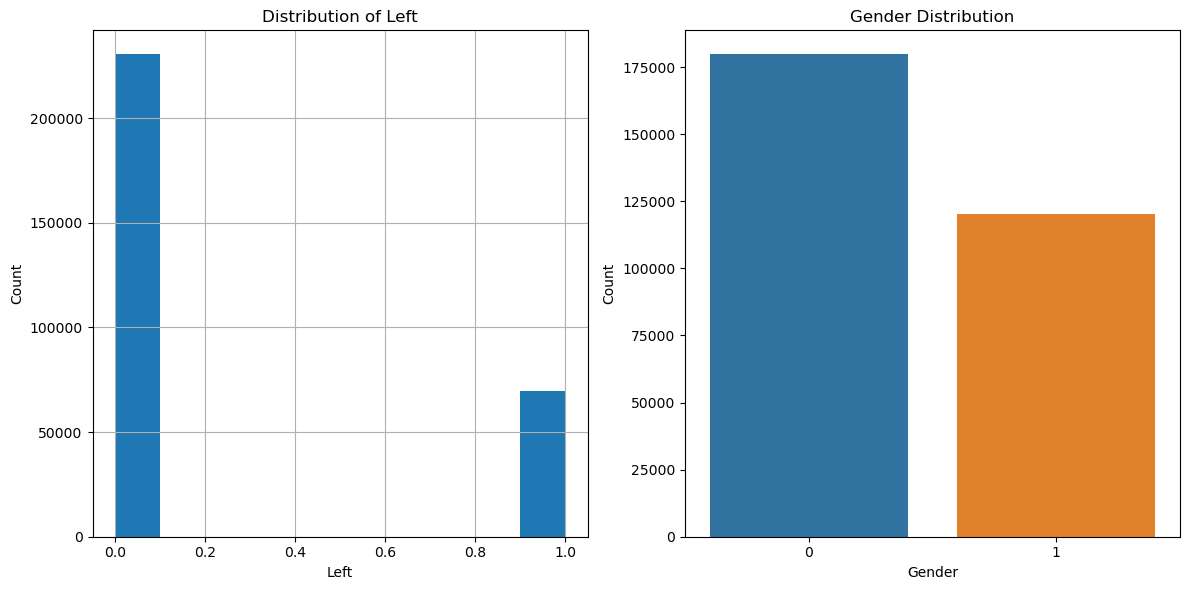

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of 'Left' column
data['Left'].hist(ax=axes[0])
axes[0].set_title('Distribution of Left')
axes[0].set_xlabel('Left')
axes[0].set_ylabel('Count')

# Plot countplot of 'Gender' column
sns.countplot(x='Gender', data=data, ax=axes[1])
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


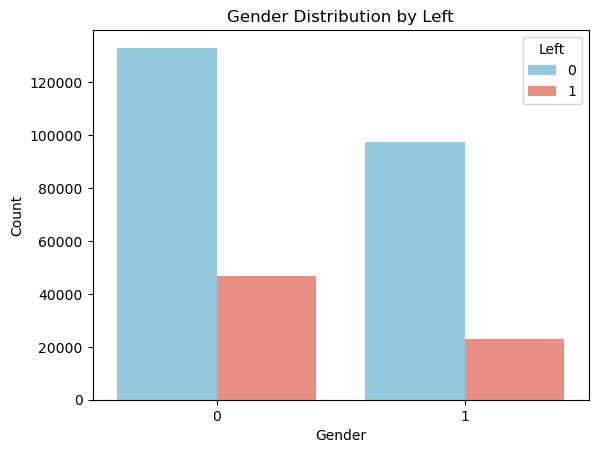

In [22]:
import seaborn as sns
left_palette = {0: 'skyblue', 1: 'salmon'}
sns.countplot(data=data, x='Gender', hue='Left', palette=left_palette)
plt.title('Gender Distribution by Left')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


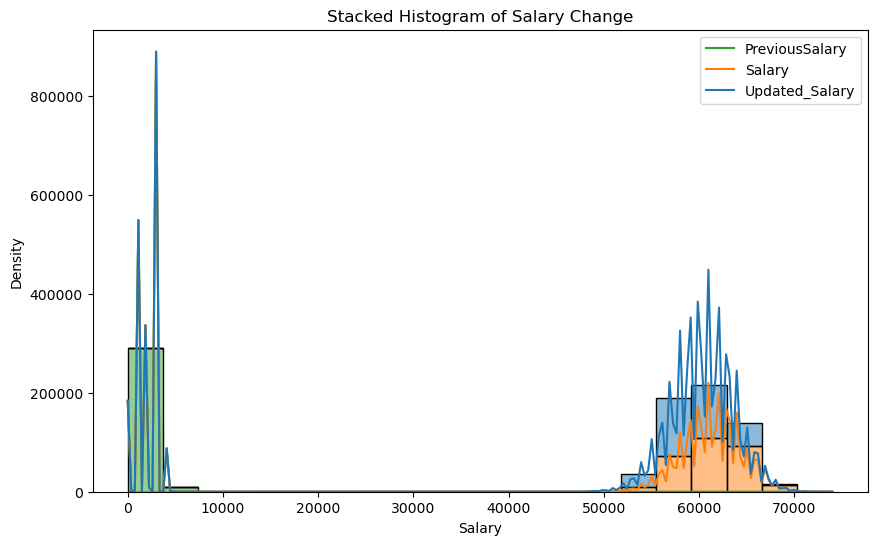

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns of interest
a = ['PreviousSalary', 'Salary', 'Updated_Salary']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for each column with stacked bars
sns.histplot(data=data[a], ax=ax, kde=True, multiple='stack', bins=20)

# Set labels and title
ax.set_xlabel('Salary')
ax.set_ylabel('Density')
ax.set_title('Stacked Histogram of Salary Change')


plt.legend(labels=a)

# Show plot
plt.show()


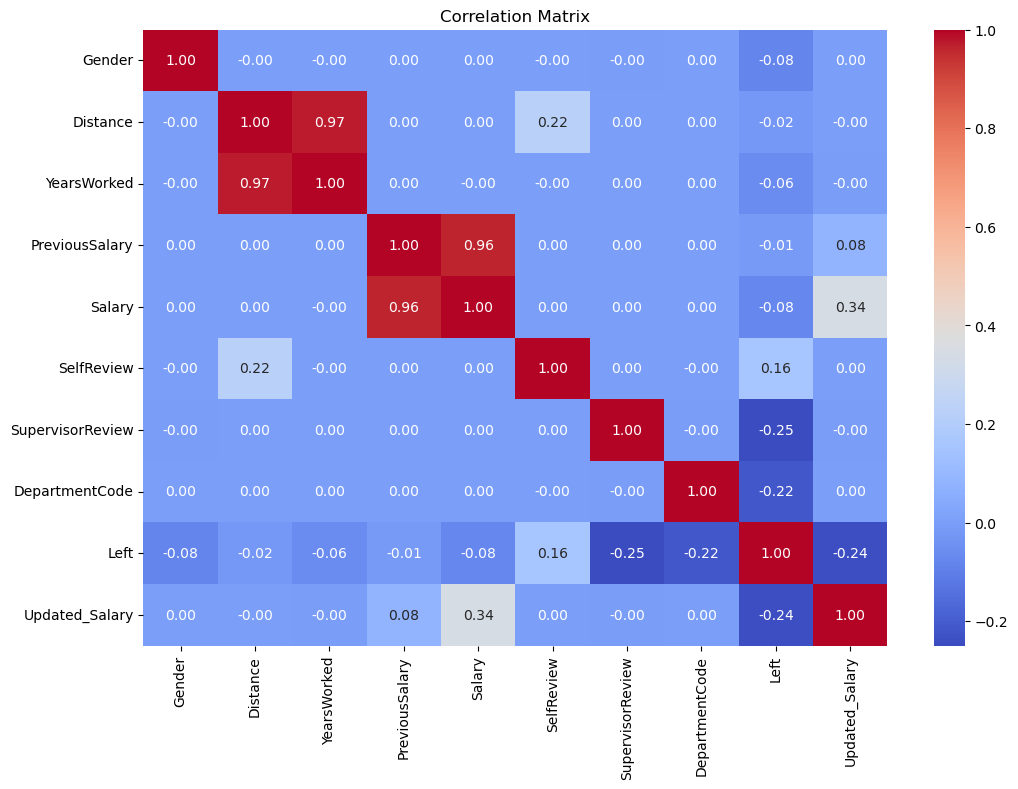

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_columns = ['Gender','Distance', 'YearsWorked', 'PreviousSalary', 'Salary','SelfReview', 'SupervisorReview', 'DepartmentCode', 'Left','Updated_Salary']
# Now you can calculate the correlation matrix
correlation_matrix = data[['Gender', 'Distance', 'YearsWorked', 'PreviousSalary', 'Salary',
                           'SelfReview', 'SupervisorReview', 'DepartmentCode', 'Left']].corr()

# Calculate correlation matrix using only numerical columns
correlation_matrix = data[correlation_columns].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [25]:
data.head()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left,Updated_Salary,ExperienceLevel
0,1,10.770330,10,63000.0,65000.0,4.0,5.0,2,0,2000.0,Advanced
1,0,8.062258,7,54000.0,56000.0,4.0,4.0,2,0,2000.0,Proficient
2,0,6.403124,5,60000.0,61000.0,4.0,4.0,3,0,1000.0,Proficient
3,0,6.403124,4,59000.0,60000.0,5.0,5.0,7,0,1000.0,Intermediate
4,1,7.810250,6,61000.0,63000.0,5.0,5.0,5,0,2000.0,Proficient


# **Observations and Findings:**

Here we have two unwanted columns ['Unnamed: 0', 'RecordId']. We are going to remove them because they aren't needed for the analysis.

The salary columns are not in the correct format they were converted into numerical data which can be useful for the analysis by making a difference between the salary and the previous salary by renaming the column 'Updated_Salary'.

Then the highest correlation is found between the previous salary and the  salary.

The left column shows a negative correlation with other fields

SelfReview and supervisor-review, which denote lower performance evaluations, exhibit a moderately positive correlation (0.16 and -0.25, respectively) with employees' departure from the company.

Employees with longer tenures, as represented by Years Worked, exhibit a weak negative correlation (-0.06) with employee departure.

We are adding experience level to tell the employee which category they belong to according to the number of years worked.

# **Creation of Pipeline**

Data preprocessing involved handling missing values using appropriate imputation techniques for both numerical and categorical features. Additionally, feature scaling was applied using StandardScaler to standardize numerical features. This step ensured that the data was properly prepared for subsequent modeling tasks.

Feature engineering included conducting exploratory data analysis (EDA) to gain insights into the dataset's characteristics. During this process, any necessary new features were engineered to enhance the model's predictive power.

Pipeline creation was a critical step in streamlining the workflow. A preprocessing pipeline was constructed using ColumnTransformer, allowing for separate transformations to be applied to numerical and categorical features. This pipeline was then integrated with the selected machine learning models to create a cohesive framework for model training and evaluation.


In the final model evaluation phase, the performance of the selected model was assessed on the test dataset to evaluate its generalization capability. Various metrics were used to thoroughly assess the model's performance and ensure that it met the project's objectives satisfactory.



In [26]:

numerical_features=['Gender','YearsWorked','DepartmentCode','SelfReview','SupervisorReview']
categorical_features=['Distance','PreviousSalary', 'Salary']

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['Gender', 'YearsWorked', 'DepartmentCode', 'SelfReview', 'SupervisorReview']
Categorical Features: ['Distance', 'PreviousSalary', 'Salary']


Split the data into Training and Test Sets

In [27]:
from sklearn.utils import resample
X_new = X.sample(frac = 0.1,random_state = 10000)
y_new = y.sample(frac = 0.1,random_state = 10000)

In [28]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming X_train and y_train are DataFrames
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)


print('Shape of training set:', X_train.shape, y_train.shape)
print('Shape of testing set:', X_test.shape, y_test.shape)

Shape of training set: (24000, 10) (24000,)
Shape of testing set: (6000, 10) (6000,)


# Numerical Pipeline and Categorical Pipeline

In [29]:
# Define preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing Pipeline

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model:

> Training several classification models, such as Random Forest, Decision Tree, and Logistic Regression, was necessary for both model evaluation and training. The performance of each model was assessed to determine how well it predicted departures of staff using suitable criteria like accuracy, precision, recall, and F1-score.

> Evaluation measures were used to determine which model performed the best during the model selection process. The model that demonstrated the best performance was chosen as the ultimate contender for implementation, guaranteeing that it successfully fulfilled the project's goals.

> Hyperparameter tuning was conducted using techniques like GridSearchCV to fine-tune the selected model's hyperparameters. The goal of this optimization method was to increase the predicted accuracy and performance of the model.

>In the final model evaluation phase, the performance of the selected model was assessed on the test dataset
to evaluate its generalization capability. Various metrics were used to thoroughly assess the
model's performance and ensure that it met the project's objectives satisfactory.

## Logistic Regression:

Logistic regression is used to predict the categorical dependent variable using a given set of independent variables.It is used for solving classification problems. In this regression we predict values of categorical variables

In [31]:
# Define the Logistic Regression Classifier
classifier = LogisticRegression(random_state=42)

# Create a pipeline with preprocessing and classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

In [32]:
# Define hyperparameters to tune
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gender',
                                                                          'YearsWorked',
                                                                          'DepartmentCode',
                                                                          'SelfReview',
                                                                          'SupervisorReview']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Distance',
                                                                          'PreviousSalary',
                                                                          'Salary'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [33]:
best_estimator = grid_search.best_estimator_

In [34]:
# Make predictions
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

In [35]:
print("Training Accuracy:")
print(accuracy_score(y_train, y_pred_train))

Training Accuracy:
0.7963333333333333


In [36]:
print("Test Accuracy:")
print(accuracy_score(y_test, y_pred_test))

Test Accuracy:
0.7993333333333333


In [37]:
# Print classification report
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     18457
           1       0.61      0.32      0.42      5543

    accuracy                           0.80     24000
   macro avg       0.72      0.63      0.65     24000
weighted avg       0.77      0.80      0.77     24000



In [38]:
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4634
           1       0.62      0.32      0.42      1366

    accuracy                           0.80      6000
   macro avg       0.72      0.63      0.65      6000
weighted avg       0.78      0.80      0.77      6000



I have observed that 80% accuracy on both training and test datasets in logistic regression does not necessarily indicate overfitting because logistic regression is a relatively simple model that tends to generalize well to unseen data. Overfitting occurs when the model learns to capture noise or random fluctuations in the training data, leading to poor performance on new, unseen data.

## Decision Tree Classifier

In [39]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [40]:
# Define preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [42]:
# Define the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Create a pipeline with preprocessing and classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])


In [43]:
# Define hyperparameters to tune
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}


In [44]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gender',
                                                                          'YearsWorked',
                                                                          'DepartmentCode',
                                                                          'SelfReview',
                                                                          'SupervisorReview']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Distance',
                                                                          'PreviousSalary',
                                                                          'Salary'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 7, 10],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [45]:
best_estimator = grid_search.best_estimator_

In [46]:
# Make predictions
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)


In [47]:
print("Training Accuracy:")
print(accuracy_score(y_train, y_pred_train))

Training Accuracy:
0.8352083333333333


In [48]:
print("Test Accuracy:")
print(accuracy_score(y_test, y_pred_test))

Test Accuracy:
0.8223333333333334


In [49]:
# Print classification report
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     18457
           1       0.67      0.56      0.61      5543

    accuracy                           0.84     24000
   macro avg       0.77      0.74      0.75     24000
weighted avg       0.83      0.84      0.83     24000



In [50]:
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4634
           1       0.63      0.52      0.57      1366

    accuracy                           0.82      6000
   macro avg       0.75      0.71      0.73      6000
weighted avg       0.81      0.82      0.82      6000



The Decision Tree model's slight variation in accuracy between the training 84% and test 82% datasets points to a low
chance of overfitting. However, it's critical to take into account relevant variables including the model's complexity, the caliber of the feature engineering, and hyperparameter tuning.

In addition, differences in the quantity and quality of data between the training and test sets may have an impact on how well the model generalizes. Regularization strategies and hyperparameter tuning can reduce overfitting and enhance the model's capacity to generalize to new data.

## Random Forest Regression

In [51]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [52]:
# Define preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Update the Random Forest modeling pipeline to use the specified variable names
rf_modeling_pipeline = Pipeline([
    ('data_processing', preprocessor),
    ('rf', RandomForestClassifier())  # Using Random Forest classifier
])


In [55]:
# Update the parameter grid for Random Forest with the specified parameters
rf_param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [None, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__class_weight': [None]
}


In [56]:
# Set the scoring metric to 'average_precision' for Precision-Recall AUC
scoring = 'average_precision'

# Configure GridSearchCV for the Random Forest pipeline with the updated names
rf_gc = GridSearchCV(estimator=rf_modeling_pipeline, param_grid=rf_param_grid, cv=5, scoring=scoring, n_jobs=-1)

# Fit the model on the training data
rf_gcv_results = rf_gc.fit(X_train, y_train)


In [57]:
# Make predictions
y_pred_train = rf_gc.predict(X_train)
y_pred_test = rf_gc.predict(X_test)

In [58]:
print("Training Accuracy:")
print(accuracy_score(y_train, y_pred_train))

Training Accuracy:
0.8781666666666667


In [59]:
print("Test Accuracy:")
print(accuracy_score(y_test, y_pred_test))

Test Accuracy:
0.821


In [60]:
# Print classification report
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     18457
           1       0.81      0.62      0.70      5543

    accuracy                           0.88     24000
   macro avg       0.85      0.79      0.81     24000
weighted avg       0.87      0.88      0.87     24000



In [61]:
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4634
           1       0.65      0.46      0.54      1366

    accuracy                           0.82      6000
   macro avg       0.75      0.69      0.71      6000
weighted avg       0.81      0.82      0.81      6000



The significant difference between training 88% and testing 82% accuracies in the Random Forest model suggests overfitting. Overfitting can occur when the model is too complex or when it's trained on insufficient data, leading to an overly specialized fit to the training set.

# **Conclusion:**

The Decision Tree model seems to be the best-performing model based on the analysis of the categorization models used in the given code. With an accuracy of 84% on training and 82% on testing, it obtained the maximum accuracy on both datasets. Decision trees are renowned for their interpretability and capacity to manage data with non-linear relationships. To ensure that the model can be applied to real-world situations and is suitable for generalization, more research is advised.

In comparison to the Decision Tree model, Random Forest's accuracy on the testing dataset (82%) was marginally lower, despite achieving a high accuracy of 88% on the training dataset. Given that Random Forest tends to produce more complicated models by integrating many decision trees, this mismatch raises the possibility that Random Forest is overfitting the training set. Reduced generalization ability on unknown data, as seen by lower accuracy on the testing dataset, might result from overfitting. Therefore, the Decision Tree model seems more reliable and deployable based on the evaluation indicators that have been provided.

